In [1]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# must run below line every time notebook gets opened so that plost will display in output
%matplotlib inline

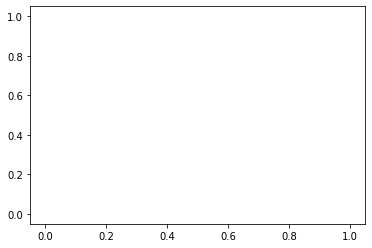

In [3]:
# empty plot
plt.plot()
plt.show()

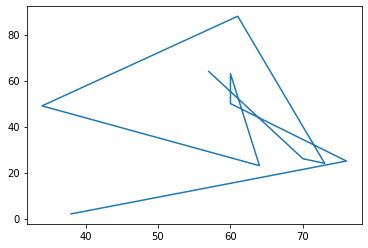

In [4]:
# set up some test data
test_df = pd.DataFrame(np.random.randint(0,100,size=(50, 2)), columns=list('AB'))
# test_df = test_df.sort_values(by=['A'])

# plot the first ten values
plt.plot(test_df['A'][:10], test_df['B'][:10])

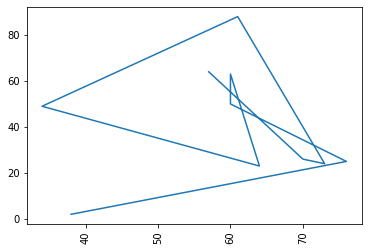

In [5]:
# rotate x labels
plt.xticks(rotation=90)

plt.plot(test_df['A'][:10], test_df['B'][:10])

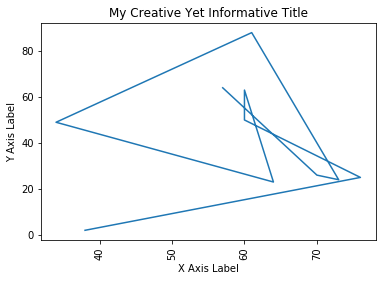

In [6]:
# rotate x labels and add titles and labels
plt.xticks(rotation=90)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('My Creative Yet Informative Title')

plt.plot(test_df['A'][:10], test_df['B'][:10])

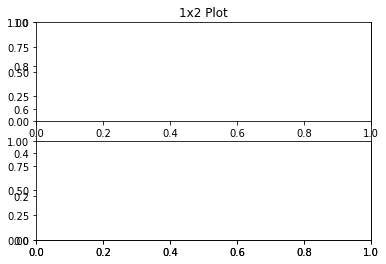

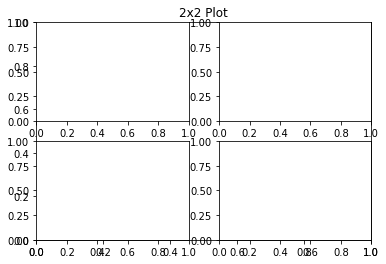

In [7]:
# Basics of Displaying Multiple Plots

fig = plt.figure()
plt.title("1x2 Plot")
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

fig = plt.figure()
plt.title("2x2 Plot")
ax1 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax1 = fig.add_subplot(2,2,3)
ax1 = fig.add_subplot(2,2,4)
plt.show()

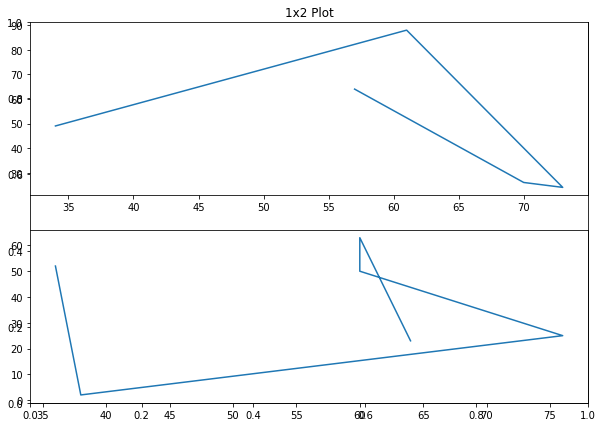

In [8]:
# adding data to multiple plots and customizing size of plot space
fig = plt.figure(figsize=(10,7))
plt.title("1x2 Plot")

ax1 = fig.add_subplot(2,1,1)
ax1.plot(test_df['A'][:5], test_df['B'][:5])

ax2 = fig.add_subplot(2,1,2)
ax2.plot(test_df['A'][5:11], test_df['B'][5:11])

plt.show()

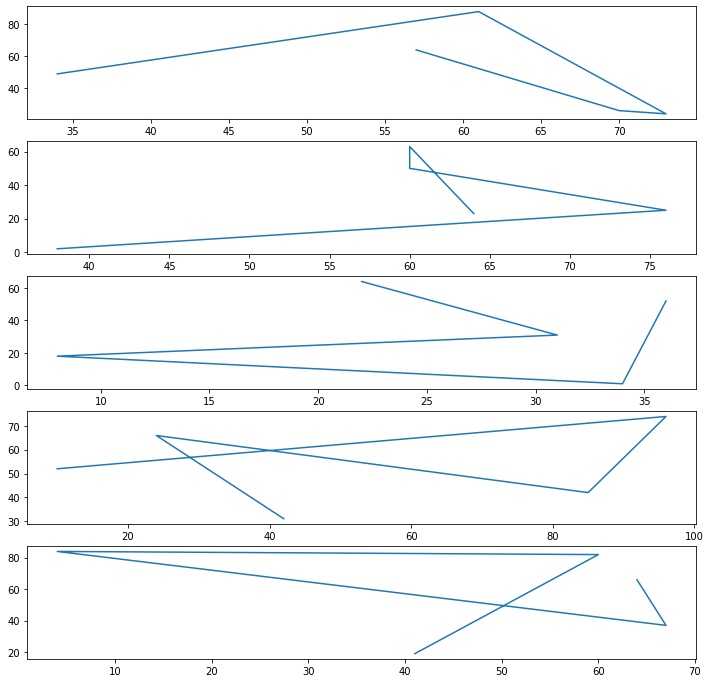

In [9]:
# display 5 subplots of groups of 5 entries - this would generally be used to compare years of data
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*5
    end_index = (i+1)*5
    subset = test_df[start_index:end_index]
    ax.plot(subset['A'], subset['B'])

plt.show()

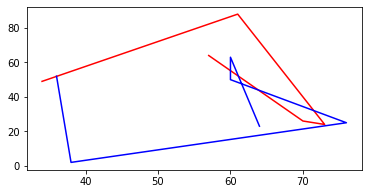

In [10]:
# display lines on a single chart
fig = plt.figure(figsize=(6,3))
plt.plot(test_df['A'][:5], test_df['B'][:5], c='red')
plt.plot(test_df['A'][5:11], test_df['B'][5:11], c='blue')

plt.show()

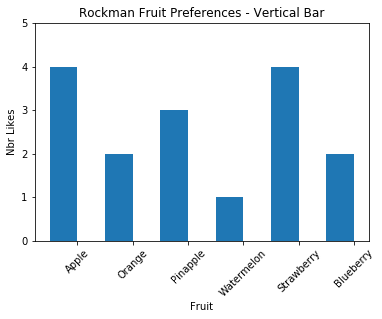

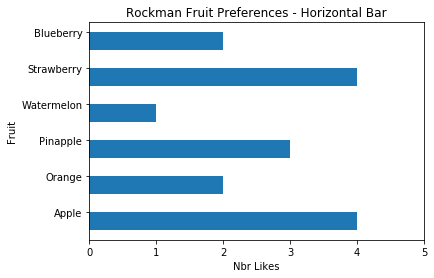

In [11]:
# bar graph
data = {'fruit': ['Apple','Orange','Pinapple','Watermelon','Strawberry','Blueberry'],
        'likes': [4,2,3,1,4,2]}
bar_df = pd.DataFrame(data)

bar_heights = bar_df['likes']
bar_positions = arange(6) + 0.75
tick_positions = range(1,7)

fig1, ax1 = plt.subplots()
ax1.bar(bar_positions, bar_heights, 0.5)
ax1.set_xlabel("Fruit")
ax1.set_ylabel("Nbr Likes")
ax1.set_title("Rockman Fruit Preferences - Vertical Bar")
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(bar_df['fruit'], rotation = 45)
ax1.set_ylim(0,5)
plt.show()


fig2, ax2 = plt.subplots()
ax2.barh(bar_positions, bar_heights, 0.5)
ax2.set_xlabel("Nbr Likes")
ax2.set_ylabel("Fruit")
ax2.set_title("Rockman Fruit Preferences - Horizontal Bar")
ax2.set_yticks(tick_positions)
ax2.set_yticklabels(bar_df['fruit'])
ax2.set_xlim(0,5)
plt.show()

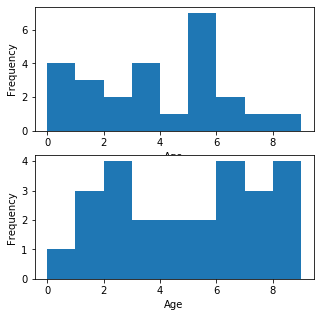

In [12]:
# histogram
hist_df = pd.DataFrame(np.random.randint(0,10,size=(25, 2)), columns=['Age','Frequency'])

fig= plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.hist(hist_df['Age'],range(0,10))
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

ax2.hist(hist_df['Frequency'],range(0,10))
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency")

plt.show()

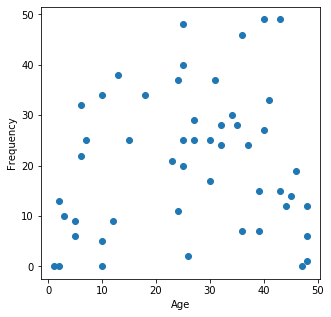

In [13]:
# scatterplot
scatter_df = pd.DataFrame(np.random.randint(0,50,size=(50, 2)), columns=['Age','Frequency'])


fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


ax.scatter(scatter_df['Age'],scatter_df['Frequency'])
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

plt.show()


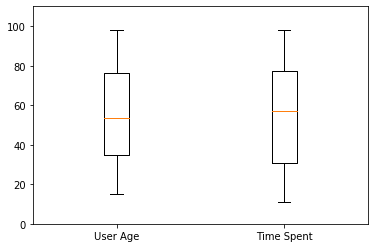

In [14]:
# box plot / box and whisker with pandas
box_df = pd.DataFrame(np.random.randint(10,99,size=(100, 2)), columns=['Age','Time Spent'])

fig, ax = plt.subplots()

ax.boxplot(box_df[['Age','Time Spent']].values)
ax.set_xticklabels(['User Age', 'Time Spent'])
ax.set_ylim(0,110)

plt.show()

### Scatter Matrix via pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91b83c9710>,
      dtype=object)

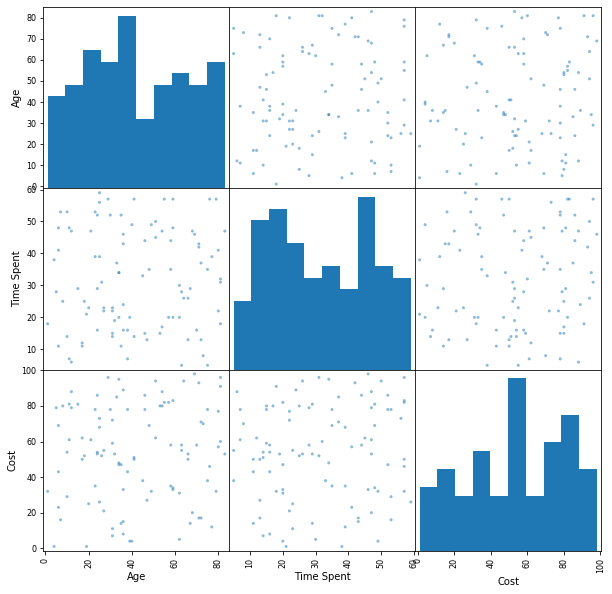

In [15]:
scatter_matrix_df = pd.DataFrame(np.random.randint(1,85,size=(100, 1)), columns=['Age'])
survived = np.random.randint(0,1,size=(100, 1))
scatter_matrix_df["Survived"] = survived
cost = np.random.randint(0,100,size=(100, 1))
scatter_matrix_df["Cost"] = cost
time = np.random.randint(5,60,size=(100, 1))
scatter_matrix_df["Time Spent"] = time


from pandas.plotting import scatter_matrix

scatter_matrix(scatter_matrix_df[['Age', 'Time Spent','Cost']], figsize=(10,10))

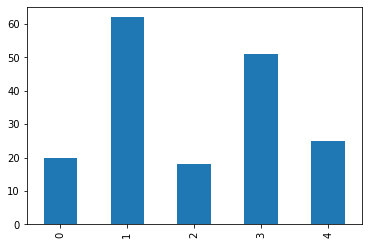

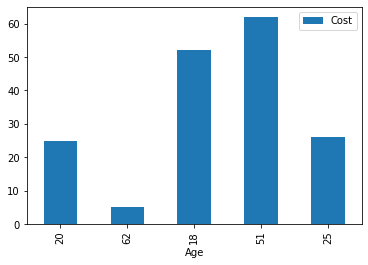

In [16]:
# quick plotting with pandas
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

scatter_matrix_df[:5]['Age'].plot(kind='bar')

scatter_matrix_df[:5].plot.bar(x='Age', y='Cost')



## Plotting multiple lines on a single plot with decreases line data/noise, custom colors

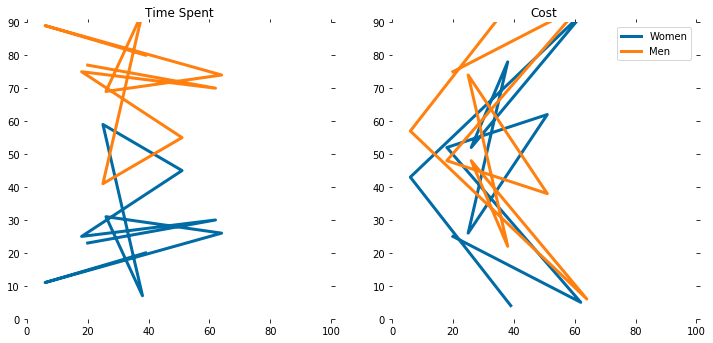

In [17]:
fig = plt.figure(figsize=(12, 12))
#use RGB codes and scale down for 0-1 values
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

major_cats = ['Time Spent','Cost']

for sp in range(0,2):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(scatter_matrix_df[:10]['Age'], scatter_matrix_df[:10][major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(scatter_matrix_df[:10]['Age'], 100-scatter_matrix_df[:10][major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    # set all scales to be the same to make it easier to compare
    ax.set_xlim(0, 100)
    ax.set_ylim(0,90)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')

plt.savefig('random_nbr_plot.png')   # save the plot!

### Seaborn Visualization

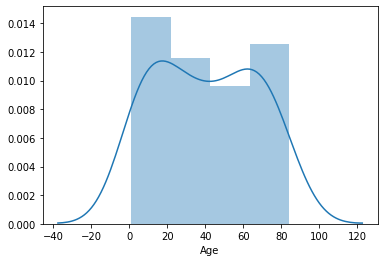

In [18]:
seaborn_df = pd.DataFrame(np.random.randint(1,85,size=(50, 1)), columns=['Age'])
survived = np.random.randint(0,2,size=(50, 1))
seaborn_df["Survived"] = survived
cost = np.random.randint(0,11,size=(50, 1))
seaborn_df["Cost"] = cost
time = np.random.randint(10,20,size=(50, 1))
seaborn_df["Time Spent"] = time


import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
sns.distplot(seaborn_df["Age"])
plt.show()

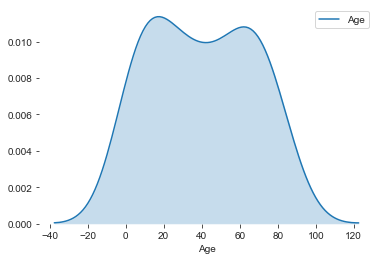

In [19]:
# formatted seaborn plot
sns.set_style("ticks")
sns.kdeplot(seaborn_df["Age"], shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom=True)
plt.show()

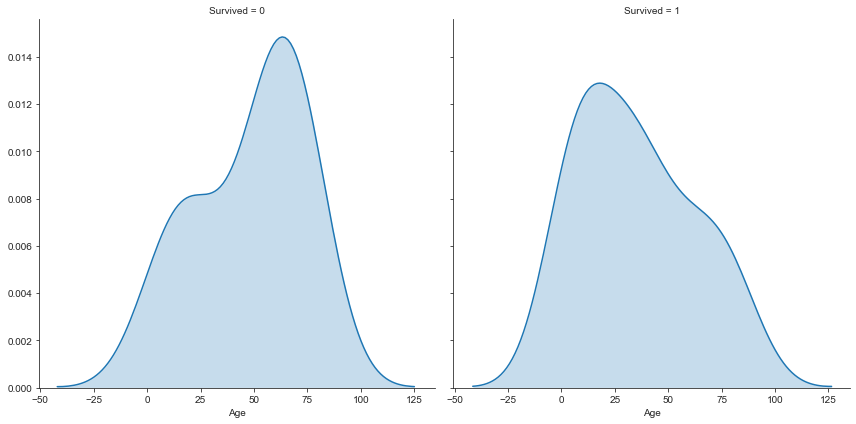

In [20]:
## conditional distributions using a single condition

# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(seaborn_df, col="Survived", height=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


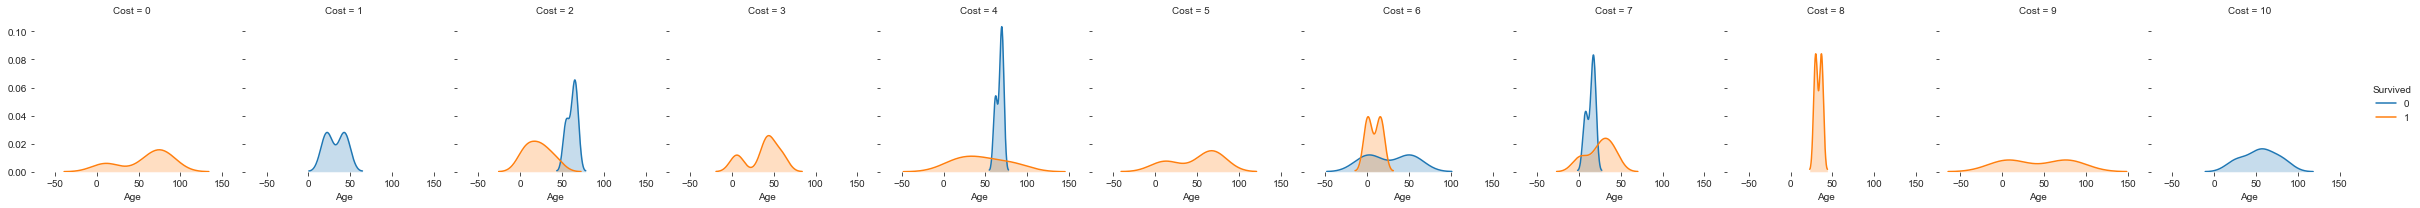

In [21]:
g = sns.FacetGrid(seaborn_df, col="Cost", hue="Survived", height=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()

### Seaborn

In [22]:
from mpl_toolkits.basemap import Basemap